In [1]:
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df['class']=data.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split

In [11]:
x=df.drop(['class'],axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [25]:
model.score(x_test,y_test)

1.0

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
y_pred=model.predict(x_test)


In [28]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [30]:
from sklearn import tree

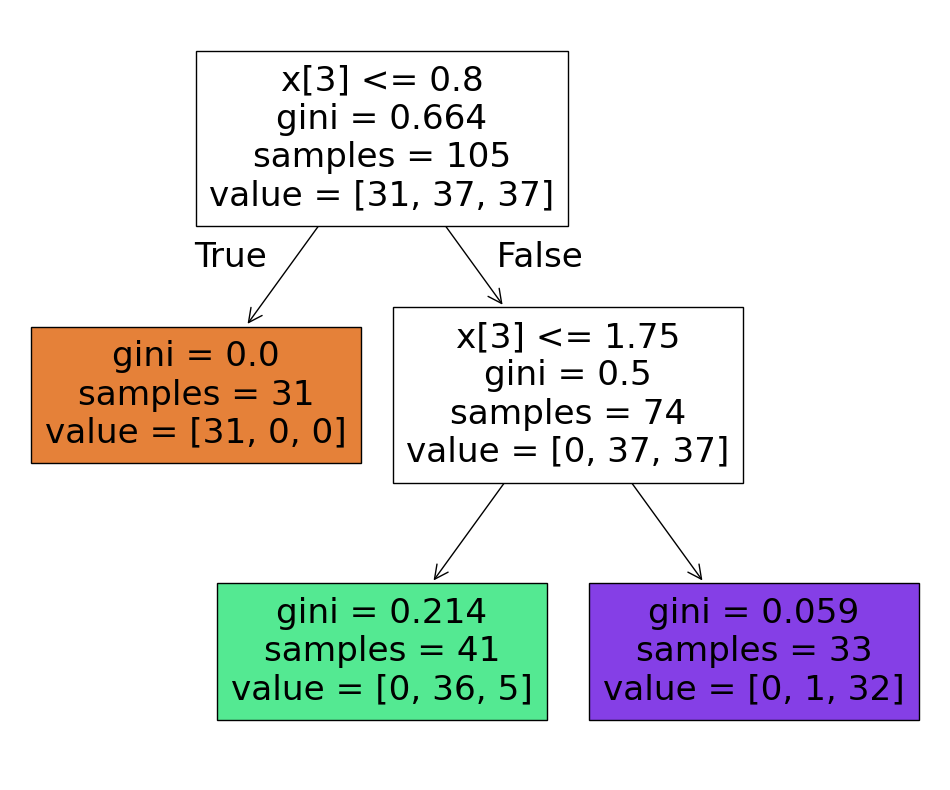

In [31]:
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)
plt.show()

# pre prunning and hyper parameter tuning

In [33]:
params={
'criterion':['gini','entopy','log_loss'],
    'splitter':['best','random'],
'max_depth':[1,2,3,4],
    'max_features':['auto','sqrt','log2']
}

In [34]:
from sklearn.model_selection import GridSearchCV


In [35]:
grid=GridSearchCV( estimator=DecisionTreeClassifier(), param_grid=params,cv=5 ,scoring='accuracy')
grid.fit(x_train,y_train)

C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\sit

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entopy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [37]:
grid.best_score_

0.9523809523809523

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [39]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)